Taken from https://docs.dkrz.de/doc/visualization/sw/python/source_code/python-matplotlib-example-unstructured-icon-triangles-plot-python-3.html

In [52]:
import time, os
import xarray as xr

import numpy as np
import numpy.ma as ma

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from   matplotlib.collections import PolyCollection

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import sys
# setting path
sys.path.append('..')

import matplotlib.colors as colors

from src import io, var, utils, fourier, lin_reg, reconstruction, physics, delaunay
from runs import interface
from vis import plotter, cart_plot

import importlib
importlib.reload(io)
importlib.reload(var)
importlib.reload(utils)
importlib.reload(fourier)
importlib.reload(lin_reg)
importlib.reload(reconstruction)
importlib.reload(physics)
importlib.reload(delaunay)

importlib.reload(interface)

importlib.reload(plotter)
importlib.reload(cart_plot)

<module 'vis.cart_plot' from '/home/ray/git-projects/spec_appx/notebooks/../vis/cart_plot.py'>

In [26]:
# initialise data objects
grid = var.grid()
topo = var.topo_cell()

# read grid
reader = io.ncdata()
fn = '../data/icon_compact.nc'
reader.read_dat(fn, grid)
grid.apply_f(utils.rad2deg) 

# read topography
fn = '../data/topo_compact.nc'
reader.read_dat(fn, topo)

# we only keep the topography that is inside this lat-lon extent.
lat_verts = np.array([52.,64.,64.])
lon_verts = np.array([-141.,-158.,-127.])

reader.read_topo(topo, topo, lon_verts, lat_verts)

topo.gen_mgrids()

Data fetched...



Cells:               122 


--> triangles done
--> polygon collection done
Wallclock time:  2.107 seconds



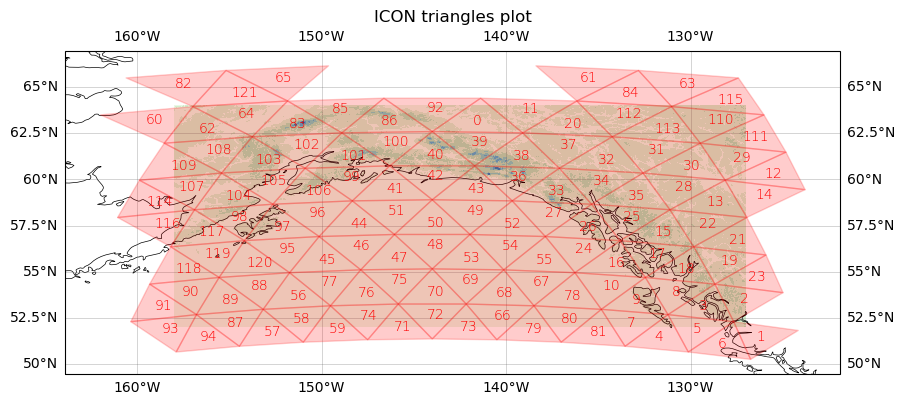

In [50]:
t1 = time.time()    #-- retrieve start time

#-- set title string
title = 'ICON triangles plot'

#--  define path, file and variable name
dir_name  = '../data/'
grid_name = 'icon_compact.nc'
# grid_name = 'icon_grid_0012_R02B04_G_linked.nc'

gname = os.path.join(dir_name,grid_name)
dsgrid = xr.open_dataset(gname)

#-- get coordinates and convert radians to degrees
clon = np.rad2deg(dsgrid.clon.values)
clat = np.rad2deg(dsgrid.clat.values)
clon_vertices = np.rad2deg(dsgrid.clon_vertices.values)
clat_vertices = np.rad2deg(dsgrid.clat_vertices.values)

ncells, nv = clon_vertices.shape[0], clon_vertices.shape[1]

#-- print information to stdout
print('')
print('Cells:            %6d ' % clon.size)
print('')

#-- set projection
projection = ccrs.PlateCarree()

#-- create figure and axes instances; we need subplots for plot and colorbar
fig, ax = plt.subplots(figsize=(10,10), subplot_kw=dict(projection=projection))

# ax.set_global()

im = ax.contourf(topo.lon_grid, topo.lat_grid, topo.topo,
            alpha=1.0,
            transform=ccrs.PlateCarree(),
            cmap='GnBu',
            )

#-- plot land areas at last to get rid of the contour lines at land
ax.coastlines(linewidth=0.5, zorder=2)
ax.gridlines(draw_labels=True, linewidth=0.5, color='dimgray', alpha=0.4,
         zorder=2)

#-- plot the title string
plt.title(title)

#-- create the triangles
clon_vertices = np.where(clon_vertices < -180., clon_vertices + 360., clon_vertices)
clon_vertices = np.where(clon_vertices >  180., clon_vertices - 360., clon_vertices)

triangles = np.zeros((ncells, nv, 2), np.float32)

for i in range(0, ncells, 1):
    triangles[i,:,0] = np.array(clon_vertices[i,:])
    triangles[i,:,1] = np.array(clat_vertices[i,:])

print('')
print('--> triangles done')

#-- create polygon/triangle collection
coll = PolyCollection(triangles, array=None, edgecolors='r', fc='r', alpha=0.2,
                      linewidth=1, transform=ccrs.Geodetic(), zorder=3)
ax.add_collection(coll)

print('--> polygon collection done')

cidx = np.arange(clon.size)

for idx in cidx:
    colour = 'r'
    fw = 2

    plt.annotate(cidx[idx], (clon[idx],clat[idx]), (clon[idx]-0.3,clat[idx]-0.2), c=colour, fontweight=fw)

#-- maximize and save the PNG file
plt.savefig('./output/plot_ICON_triangles.png', bbox_inches='tight',dpi=150)

#-- get wallclock time
t2 = time.time()
print('Wallclock time:  %0.3f seconds' % (t2-t1))
print('')

--> polygon collection done


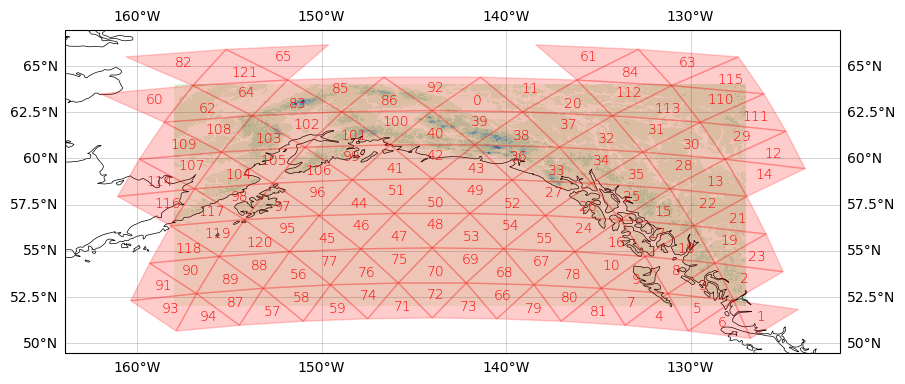

In [54]:
cart_plot.lat_lon_icon(topo, triangles,ncells=ncells, clon=clon, clat=clat)